In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [6]:
nltk.download("wordnet")
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
data = pd.read_csv("/content/SMS_train.csv",engine="python",on_bad_lines='skip', encoding='latin1')

In [13]:
data.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [14]:
data.Label = np.where(data.Label=="Spam",1,0)

In [15]:
data.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,0
1,2,The guy did some bitching but I acted like i'd...,0
2,3,"Pity, * was in mood for that. So...any other s...",0
3,4,Will ü b going to esplanade fr home?,0
4,5,This is the 2nd time we have tried 2 contact u...,1


In [17]:
x = data.Message_body
y = data.Label

In [19]:
corpus = []
lemmatizer = WordNetLemmatizer()
for i in range(len(x)):
  words = re.sub("[^a-zA-Z]"," ",x[i]).lower().split()
  words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words("english"))]
  corpus.append(" ".join(words))

In [20]:
corpus[:5]

['rofl true name',
 'guy bitching acted like interested buying something else next week gave u free',
 'pity mood suggestion',
 'b going esplanade fr home',
 'nd time tried contact u u pound prize claim easy call p per minute bt national rate']

In [24]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
print(len(word_index))

2640


In [25]:
sequence = tokenizer.texts_to_sequences(corpus)
print(sequence[:5])

[[1073, 188, 165], [98, 1074, 674, 12, 492, 381, 145, 219, 99, 34, 382, 1, 6], [1075, 1076, 675], [87, 38, 676, 1077, 28], [258, 8, 309, 100, 1, 1, 259, 65, 51, 220, 2, 35, 221, 222, 146, 493, 166]]


In [27]:
padded_sequence = pad_sequences(sequence,maxlen=max([len(i) for i in sequence]),padding = "pre")

In [28]:
padded_sequence[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0, 1073,  188,  165],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,   98, 1074,  674,   12,
         492,  381,  145,  219,   99,   34,  382,    1,    6],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0

In [29]:
x_train,x_test,y_train,y_test = train_test_split(padded_sequence,y,test_size=0.2,random_state=42)

In [64]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1,128,input_length=padded_sequence.shape[1]))
model.add(GRU(128,return_sequences=True,activation="relu"))
model.add(GRU(128,return_sequences=False,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [65]:
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.8398 - loss: 0.5656 - val_accuracy: 0.8594 - val_loss: 0.3048
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8817 - loss: 0.2423 - val_accuracy: 0.8594 - val_loss: 0.2362
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9020 - loss: 0.1412 - val_accuracy: 0.8906 - val_loss: 0.1875
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9712 - loss: 0.0988 - val_accuracy: 0.9323 - val_loss: 0.1797
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9977 - loss: 0.0446 - val_accuracy: 0.9740 - val_loss: 0.0761
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9994 - loss: 0.0044 - val_accuracy: 0.9635 - val_loss: 0.1473
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9844 - val_loss: 0.0782
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9844 - 

In [66]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 64, 128)             │         338,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 64, 128)             │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 128)                 │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,608,965 (6.14 MB)

 Trainable params: 536,321 (2.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,072,644 (4.09 MB)

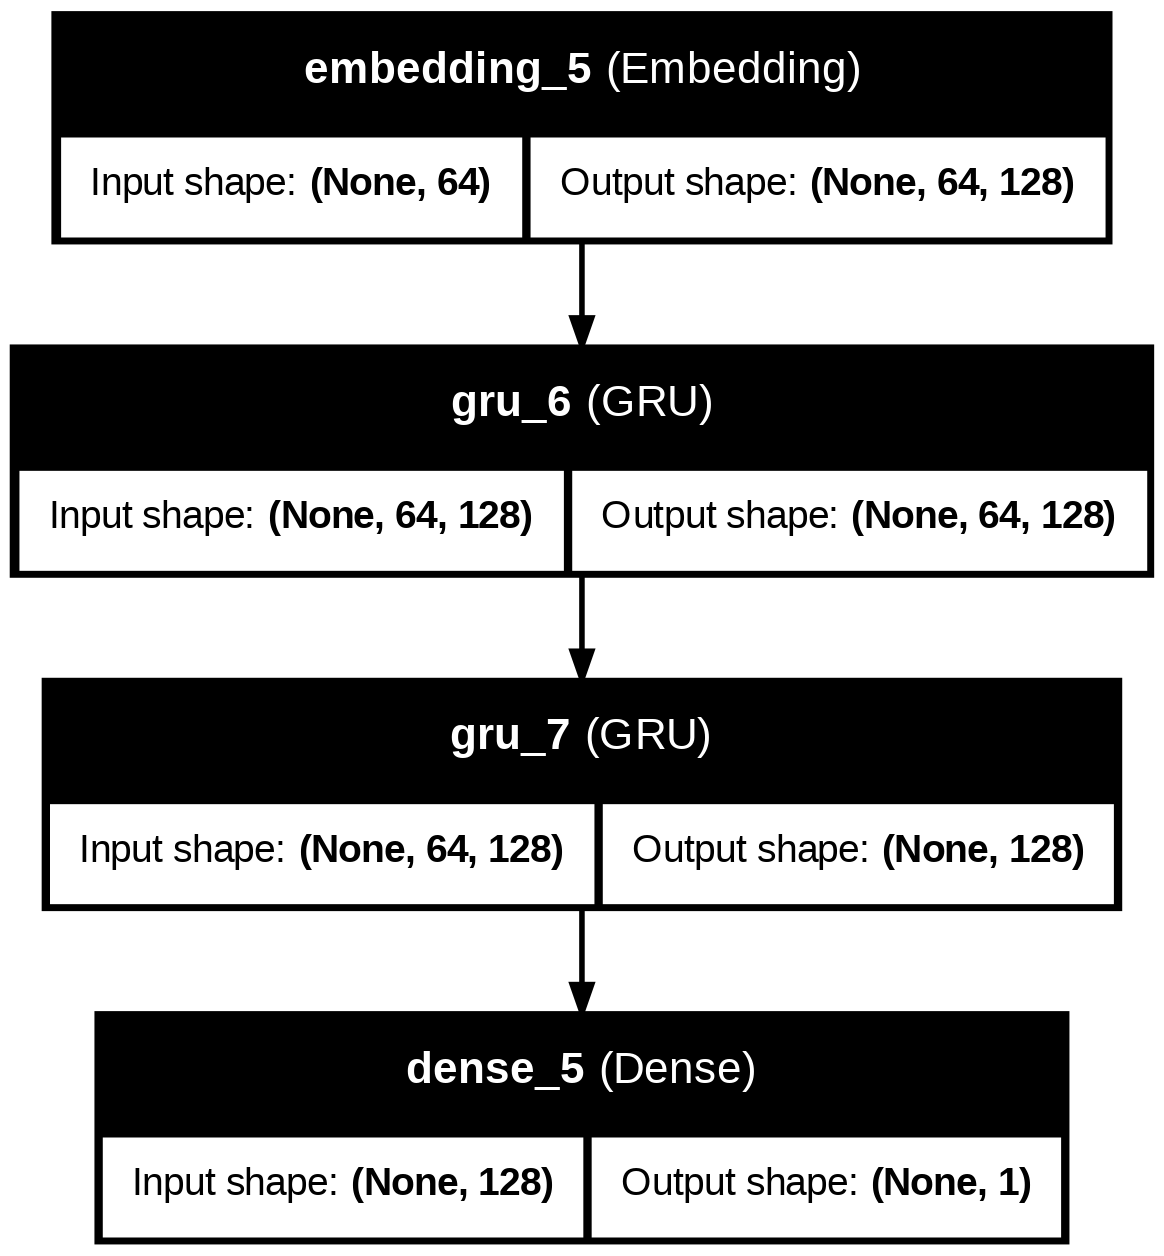

In [67]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [68]:
pred= model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step 


In [69]:
accuracy_score(y_test,np.where(pred>0.5,1,0))

0.984375

In [70]:
print(classification_report(y_test,np.where(pred>0.5,1,0)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       165
           1       1.00      0.89      0.94        27

    accuracy                           0.98       192
   macro avg       0.99      0.94      0.97       192
weighted avg       0.98      0.98      0.98       192

